In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ridgeRegression import *
from diffevol import *
import openbabel as ob
from moleculToVector import *
from thetas import *

/home/xomaiya/.conda/envs/ml/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
structs = read_dataset('test-Olesya/11_cis-pos-1.xyz') + read_dataset('test-Olesya/11_cis-pos-1_1.xyz')
struct_description = get_struct_description()
dataset_with_description = get_dataset(structs, struct_description)
thetas = get_initial_thetas()

In [4]:
y = np.array([struct[2] for struct in structs])

In [5]:
dataset, struct_description = dataset_with_description
print(len(dataset), len(struct_description[5]))
print(dataset[0])
de = DE(dataset_with_description, struct_description, y)
N = dataset[0].shape[1] + dataset[1].shape[1] + dataset[2].shape[1] + dataset[3].shape[1] + len(struct_description[5]) + 1
de.run(N, 10)

4 57
[[1.09594149 1.09605486 1.09922277 ... 1.10000496 1.09140757 1.09572824]
 [1.11332493 1.06524008 1.08473354 ... 1.12051091 1.08393896 1.09045088]
 [1.12929027 1.04981155 1.07990366 ... 1.13804091 1.08289401 1.09100641]
 ...
 [1.11732669 1.0644401  1.1106306  ... 1.1307403  1.12513513 1.10447946]
 [1.10900499 1.05503215 1.10774962 ... 1.12013036 1.12209519 1.10599134]
 [1.10008696 1.06484467 1.10488329 ... 1.10743292 1.11270804 1.10825528]]
120.1610958118769
88.44288065123968
87.08731440682772
87.08731440682772
87.08731440682772
76.98656782113395
73.19498956600525
73.19498956600525
73.19498956600525
66.01902811725424
59.55662340112529
59.55662340112529
53.14739624581446
53.14739624581446
53.14739624581446
44.1190524462031
44.1190524462031
44.1190524462031
43.81559216553677
43.81559216553677
38.00720688250888
38.00720688250888
37.47209913570363
37.47209913570363
31.671227228669174
31.671227228669174
31.671227228669174
31.671227228669174
30.30414558545871
30.30414558545871
29.7960610

KeyboardInterrupt: 

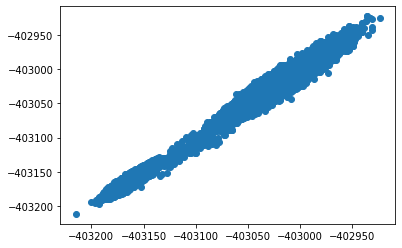

In [6]:
H, stdH = constrH(dataset_with_description, de.best_p[1:])
y = np.array([struct[2] for struct in structs])
l = de.best_p[0]
C, y_est = RidgeRegression(H, y, l)
plt.scatter(y, y_est)

In [7]:
for i, j in zip(thetas, de.best_p):
    print(i, j)

1.09 1.7703387352710314
1.09 7.051400466367819
1.09 0.1770016901556203
1.09 0.8807755544660233
1.526 0.23160529331732535
1.09 12.80889503806924
1.09 0.18711649154191173
1.09 0.3721063352408719
1.526 2.066166543105934
1.526 24.772383416428045
1.09 25.064278734103034
1.09 0.7424940409611802
1.51 2.8892721852490917
1.51 9.16871691328842
1.09 1.4473586944541772
1.471 5.815567391258129
1.09 4.842936521055268
1.08 22.975131221624014
1.51 0.2683258918365275
1.09 0.6548477957350183
1.09 0.9165951319953106
1.34 2.355518432248675
1.4 0.39440580935506997
1.09 0.7534543354909202
1.471 0.5181845114876968
1.08 1.0251940052318402
1.09 21.821903186195016
1.34 10.572205985915527
1.34 7.680028692915565
1.09 5.499022170638067
1.08 0.3392209428160381
1.526 21.26191481787026
1.09 0.4377535180880688
1.08 0.6908893083779
1.09 33.53030353830543
1.09 0.26441811324346426
1.4 0.689300372137293
1.4 3.413497254675911
1.4 12.602764888478024
1.4 0.40879341604575853
1.08 2.9828019907085563
1.4 0.8066047599948559
1.4 

In [9]:
for i in de.best_p[len(thetas):]:
    print(i)

-112.40666434830906
29.367717883998665
-45.4346898905668
31.054914944428166
20.209394240823432
-18.585459799024363
-31.75731408906839
-0.07550067965979423
7.488424337988192
-121.21395589911505
43.764787712039634
199.19616057181887
3.1763832396188807
68.99273099008104
7.410300786878844
59.256098982881795
-12.083046248992872
-140.35886922121455
10.025218408998136
25.52437392280268
-17.352080319281974
45.94463580699333
121.46439630400951
119.50749275894856
-16.05103622898965
-33.41958189706844
646.0279704990219
-1.4471033138803122
-38.271127550789714
-61.66423513264548
-5.522850695570135
170.51001309657647
-94.39809099842186
11.557412650143593
45.419940070142445
-4.550660129452869
12.343221913665563
-80.00693702054734
-4.4691060252254236
-94.93763758998207
-24.371959517639734
34.60183435332961
544.5025725699832
-15.405736349570194
25.1158180275892
-34.229570202567714
34.42504175235112
15.444424187697452
102.910020314805
-12.106227637897417
16.133119917132866
-113.40913488989588
-28.543680

In [15]:
b = len(de.struct_description[0])
a = len(de.struct_description[1])
t = len(de.struct_description[2])
p = len(de.struct_description[3])
print(b, a, t, p)

print(len(thetas), b + a + t)
print(len(de.best_p), b + a + t + 2 * p)
print(N)

57 102 131 131
290 290
1887 552
1887
